In [1]:
import connect_four
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Checking that everything works

In [2]:
joc = connect_four.Table()

In [8]:
joc.table

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [7]:
joc.drop(1,1)

Player 1 wins!


In [5]:
%timeit joc.reset()

672 ns ± 77.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
%timeit joc.table.fill(0)

433 ns ± 54.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Random games!

Play `n` games iterating over players 1 and 2 and random integer generator for the column

In [9]:
from itertools import cycle

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import connect_four
%matplotlib inline

In [72]:
%%time
joc = connect_four.Table()
simulations = 10000
results = []
tables = []
for _ in range(simulations):
    player_generator = (player for player in cycle([1,2]))
    player = next(player_generator)
    first_game = joc.drop_sim(player)
    first_column = first_game[2]
    while True:  # play until the game ends 
        player = next(player_generator)
        game_status = joc.drop_sim(player)
        if game_status[0] and not game_status[1]:
            tables.append(joc.table.copy())
            winner_info = (player, first_column)
            last_mov_info = game_status[2]
            results.append(last_mov_info)
            break
        elif game_status[1]:
            break
    joc.reset()

Wall time: 45.8 s


In [73]:
len(results)

9979

In [74]:
def last_mov(j, table, mat):
    last_col =  table[:,j]
    i = np.nonzero(last_col)[0][0]
    
    mat[i,j] += 1 

In [75]:
mat = np.zeros((6,7))

for j, table in zip(results, tables):
    last_mov(j, table, mat)

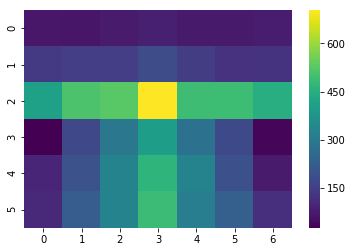

In [77]:
sns.heatmap(mat, cmap='viridis')

In [44]:
player_wins = [x[0] for x in results]
first_columns = [x[1] for x in results]

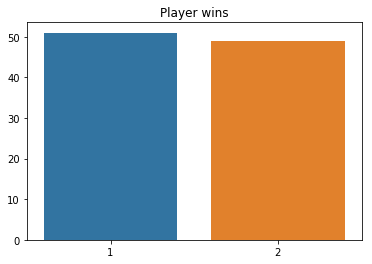

In [45]:
player_id = np.unique(player_wins, return_counts=True)[0]
n_wins = np.unique(player_wins, return_counts=True)[1]
sns.barplot(player_id, n_wins, )
plt.title('Player wins')
plt.show()

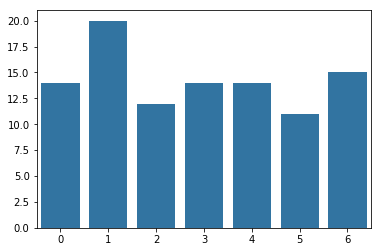

In [48]:
bars = np.unique(first_columns, return_counts=True)[1]
column_num = np.unique(first_columns, return_counts=True)[0]
sns.barplot(column_num, bars, color='C0')
plt.show()